In [40]:
import json
import matplotlib.pyplot as plt
import datasets
import pandas as pd

In [41]:
test_data = datasets.load_dataset('allenai/sciq', split='test').to_pandas()
test_data.iloc[17]

question          What do most living things use to make atp fro...
distractor3                                                nitrogen
distractor1                                                 enzymes
distractor2                                                  carbon
correct_answer                                               oxygen
support           Today, most living things use oxygen to make A...
Name: 17, dtype: object

In [42]:
def load_pipeline_analysis_data(name):
    """
    Load the analysis data for a pipeline
    
    :param name: the name of the pipeline
    :return: a pandas DataFrame with the analysis data
    """
    file_name = f'pipeline_results/analysis_{name}_result.json'
    with open(file_name, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

pipelines_metrics = {
    'pipeline1': load_pipeline_analysis_data('pipeline1'),
    'pipeline2': load_pipeline_analysis_data('pipeline2'),
    'pipeline3': load_pipeline_analysis_data('pipeline3')
}
pipelines_metrics['pipeline1']

,generated_question,bleu,rouge1,rouge2,rougeL,bleurt,bertscore,generated_distractors,max_bleurt,ordered_distractors
0,Compounds that are capable of accepting electr...,0.593421,0.967742,0.965517,0.967742,0.619479,0.974673,"[reducing agents, reducing agents, reducing ag...",-2.445423,"[antioxidants, residues, Oxygen]"
1,What is a genetically exact copy of an organism?,0.579722,0.761905,0.631579,0.761905,-0.525139,0.933189,"[zygote, transgenic, whole new genome]",-3.332242,"[phenotype, adult, male]"
2,Vertebrata are characterized by the presence o...,1.000000,1.000000,1.000000,1.000000,1.082794,1.000000,"[cranium, cranium, cranium]",-1.757693,"[Bones, Muscles, Thumbs]"
3,What is the height above or below sea level?,0.817613,0.947368,0.941176,0.947368,0.358549,0.966026,"[sea level, mountain, land]",-1.972088,"[latitude, depth, variation]"
4,"What do ice cores, varves, and ice cores indic...",0.000000,0.592593,0.400000,0.518519,-0.373825,0.887339,"[ice cores, varves, ice cores]",-2.446385,"[fossils, mountain ranges, magma]"
...,...,...,...,...,...,...,...,...,...,...
995,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None
996,What belt do short-period comets come from?,0.365555,0.800000,0.769231,0.800000,0.097198,0.969548,"[Oort cloud, Neptune, Oort cloud]",-3.349136,"[milky way, vesta belt, photon belt]"
997,None,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None
998,Atoms with unstable nuclei are called what?,0.251242,0.705882,0.533333,0.588235,-0.024296,0.899908,"[unstable, unstable, stable]",-0.063993,"[unstable, destructive, ions]"


In [43]:
pipelines_metrics['pipeline1'].iloc[17]

generated_question       What do most living things use to make ATP fro...
bleu                                                              0.734889
rouge1                                                                 1.0
rouge2                                                                 1.0
rougeL                                                                 1.0
bleurt                                                            1.070868
bertscore                                                         0.981459
generated_distractors            [bacteria, anaerobic respiration, plants]
max_bleurt                                                       -1.111106
ordered_distractors                            [enzymes, nitrogen, carbon]
Name: 17, dtype: object

In [44]:
pipelines_metrics['pipeline2'].iloc[17]

generated_question       What do most living things use to make ATP fro...
bleu                                                              0.734889
rouge1                                                                 1.0
rouge2                                                                 1.0
rougeL                                                                 1.0
bleurt                                                            1.070869
bertscore                                                         0.981459
generated_distractors                [ATP, glucose, anaerobic respiration]
max_bleurt                                                       -2.000398
ordered_distractors                            [carbon, nitrogen, enzymes]
Name: 17, dtype: object

In [45]:
pipelines_metrics['pipeline3'].iloc[17]

generated_question       What do living things use to make ATP from glu...
bleu                                                              0.470852
rouge1                                                            0.952381
rouge2                                                            0.842105
rougeL                                                            0.952381
bleurt                                                            0.855509
bertscore                                                         0.973137
generated_answer                                                    oxygen
bleu_ans                                                               0.0
rouge1_ans                                                             1.0
rouge2_ans                                                             0.0
rougeL_ans                                                             1.0
bertscore_ans                                                          1.0
generated_distractors    

In [46]:
def load_pipeline_data(name):
    """
    Load the generated data for a pipeline
    
    :param name: the name of the pipeline
    :return: a pandas DataFrame with the generated data
    """
    file_name = f'pipeline_results/{name}_result.json'
    with open(file_name, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    return df

pipeline3 = load_pipeline_data('pipeline3')
pipeline3.iloc[17]

support                  Today, most living things use oxygen to make A...
generated_question       What do living things use to make ATP from glu...
generated_answer                                                    oxygen
generated_distractors    [bacteria, anaerobic respiration, aerobic resp...
time                                                              7.503124
Name: 17, dtype: object

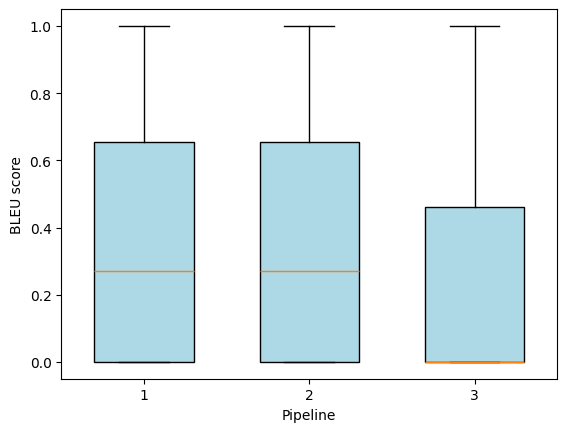

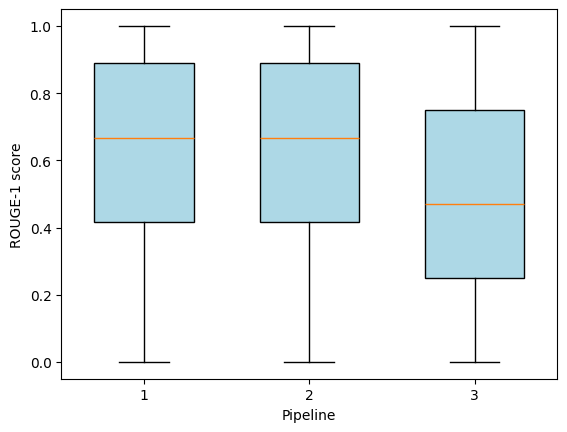

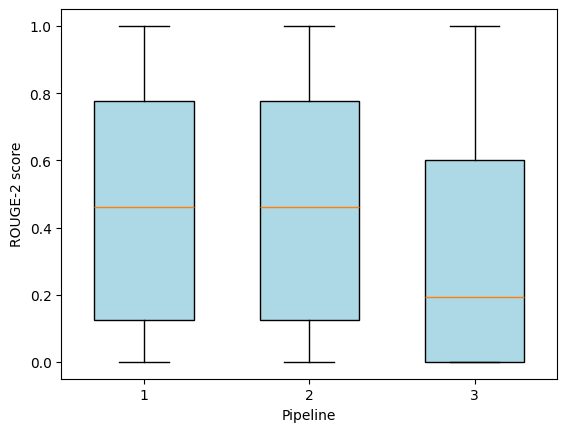

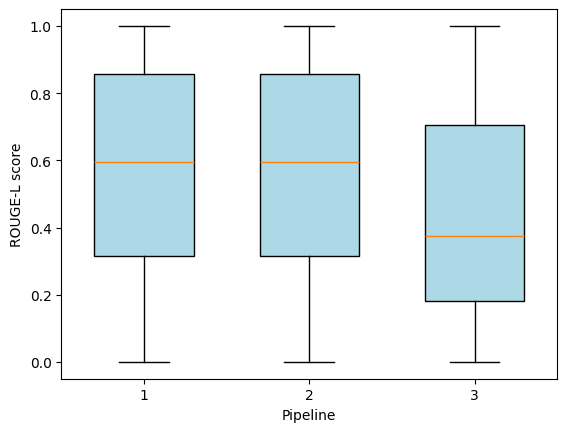

In [47]:
def plot_bleu(pipelines_metrics):
    """
    Plot the BLEU score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['bleu'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('BLEU score')
    plt.show()

def plot_rouge1(pipelines_metrics):
    """
    Plot the ROUGE-1 score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['rouge1'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('ROUGE-1 score')
    plt.show()

def plot_rouge2(pipelines_metrics):
    """
    Plot the ROUGE-2 score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['rouge2'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('ROUGE-2 score')
    plt.show()
    
def plot_rougeL(pipelines_metrics):
    """
    Plot the ROUGE-L score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['rougeL'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('ROUGE-L score')
    plt.show()
    
def plot_bleurt(pipelines_metrics):
    """
    Plot the BLEURT score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['bleurt'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('BLEURT score')
    plt.show()
    
def plot_bertscore(pipelines_metrics):
    """
    Plot the BERTScore score for each pipeline
    
    :param pipelines_metrics: a dictionary with the metrics for each pipeline
    """
    fig, ax = plt.subplots()
    for pipeline_name, df in pipelines_metrics.items():
        ax.boxplot(df['bertscore'].dropna(), positions=[int(pipeline_name[-1])], showfliers=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_xlabel('Pipeline')
    ax.set_ylabel('BERTScore score')
    plt.show()
    
    
plot_bleu(pipelines_metrics)
plot_rouge1(pipelines_metrics)
plot_rouge2(pipelines_metrics)
plot_rougeL(pipelines_metrics)